# Covid-19 Data Analysis

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#Loading the dataset

covid = pd.read_csv(r'C:\Users\HP\Downloads\covid 19\covid_19_india.csv')

In [3]:
#Looking the dataset

covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [5]:
covid.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [6]:
covid.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], inplace=True, axis=1)

In [7]:
covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [8]:
#Finding the number of active cases and creating a new column

covid['Active_Cases'] = covid['Confirmed'] - covid['Cured'] - covid['Deaths']

In [9]:
covid.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [10]:
#Creating a pivot table

statewise = pd.pivot_table(covid, values = ['Confirmed', 'Deaths', 'Cured'], index = 'State/UnionTerritory', aggfunc = max)

In [11]:
statewise['Recovery_Rate'] = statewise['Cured'] * 100 / statewise['Confirmed']

In [12]:
statewise['Death_Rate'] = statewise['Deaths'] * 100 / statewise['Confirmed']

In [13]:
statewise.style.background_gradient(cmap = 'twilight_shifted')

,Confirmed,Cured,Deaths,Recovery_Rate,Death_Rate
State/UnionTerritory,,,,,
Andaman and Nicobar Islands,7548,7412,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,248,94.498567,0.490070
Assam,576149,559684,5420,97.142232,0.940729
Bihar,725279,715352,9646,98.631285,1.329971
Bihar****,715730,701234,9452,97.974655,1.320610
Cases being reassigned to states,9265,0,0,0.000000,0.000000
Chandigarh,61992,61150,811,98.641760,1.308233
Chhattisgarh,1003356,988189,13544,98.488373,1.349870


In [14]:
#Finding the top 10 active-cases states

top_10_states = covid.groupby('State/UnionTerritory')[['Active_Cases']].max().sort_values('Active_Cases', ascending=False).reset_index()

In [15]:
top_10_states.head(10)

,State/UnionTerritory,Active_Cases
0,Maharashtra,701614
1,Karnataka,605515
2,Kerala,445692
3,Tamil Nadu,313048
4,Uttar Pradesh,310783
5,Rajasthan,212753
6,Andhra Pradesh,211554
7,Gujarat,148297
8,West Bengal,132181
9,Chhattisgarh,131245


Text(0.5, 1.0, 'Top 10 Active Cases States')

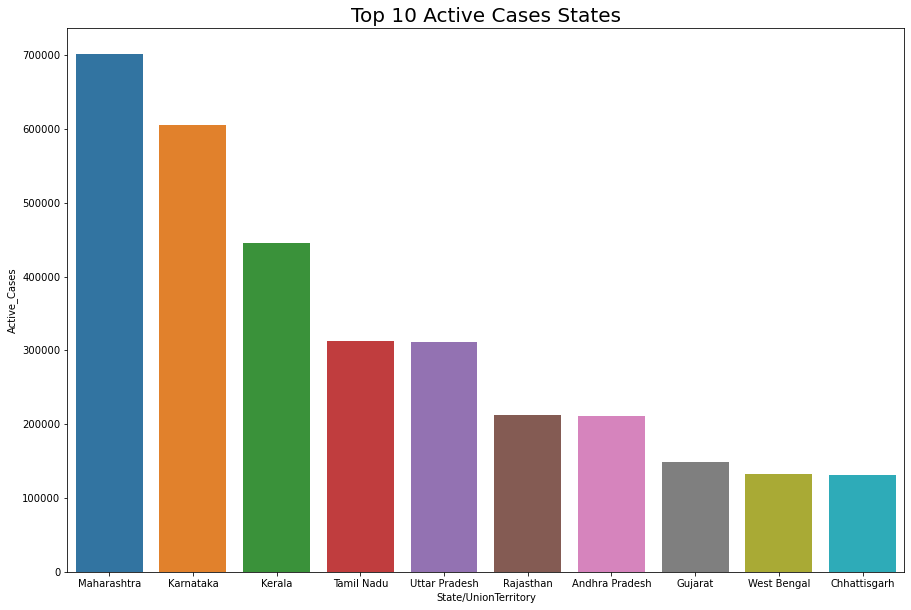

In [16]:
#Visualising the top 10 active-cases states

plt.figure(figsize= (15,10))
sns.barplot(x = 'State/UnionTerritory', y = 'Active_Cases', data=top_10_states.iloc[:10])
plt.title('Top 10 Active Cases States', size = 20)

In [17]:
#Finding the top 10 states with the death rate

top_10_death_states = covid.groupby('State/UnionTerritory')[['Deaths']].max().sort_values('Deaths', ascending=False).reset_index()

In [18]:
top_10_death_states.head(10)

,State/UnionTerritory,Deaths
0,Maharashtra,134201
1,Maharashtra***,130753
2,Karnataka,36848
3,Karanataka,36197
4,Tamil Nadu,34367
5,Delhi,25068
6,Uttar Pradesh,22775
7,West Bengal,18252
8,Kerala,18004
9,Punjab,16322


Text(0.5, 1.0, 'Top 10 States With The Highest Deaths')

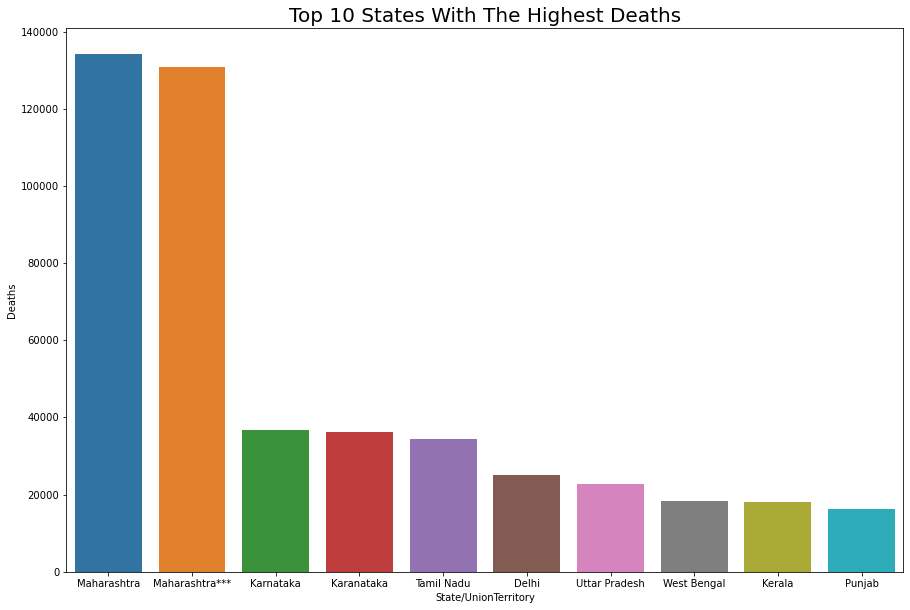

In [19]:
#Visulaising the top states with the highest deaths

plt.figure(figsize= (15,10))
sns.barplot(x = 'State/UnionTerritory', y = 'Deaths', data=top_10_death_states.iloc[:10])
plt.title('Top 10 States With The Highest Deaths', size = 20)

In [20]:
#Loading the second dataset

vaccine = pd.read_csv(r'C:\Users\HP\Downloads\covid 19\covid_vaccine_statewise.csv')

In [21]:
#Looking the second dataset

vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [22]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [23]:
vaccine.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [24]:
vaccine.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [26]:
#Dropping unnecessary columns

vaccine.drop(['AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], inplace = True, axis=1)

In [27]:
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [29]:
#Male vs Female Vaccination

male = vaccine['Male (Doses Administered)'].sum()
female = vaccine['Female (Doses Administered)'].sum()

In [30]:
male

27009983996.0

In [31]:
female

23639554465.0

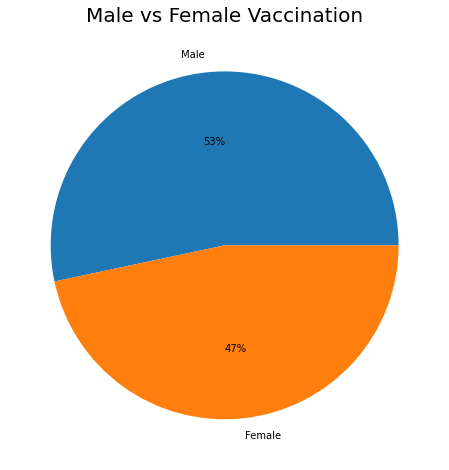

In [76]:
plt.figure(figsize = (8,8))
plt.pie(x = [male, female], labels = ['Male', 'Female'], autopct='%.0f%%')
plt.title('Male vs Female Vaccination', size = 20)
plt.show()

In [44]:
#Hiding those rows where column 'State' has value 'India'

vaccine = vaccine[vaccine['State'] != 'India']
vaccine

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#Finding the number of vaccines administered states-wise

vacc_status = vaccine.groupby('State')[['Total Individuals Vaccinated']].sum().sort_values('Total Individuals Vaccinated', ascending = False).reset_index()
vacc_status

,State,Total Individuals Vaccinated
0,Maharashtra,1.403075e+09
1,Uttar Pradesh,1.200575e+09
2,Rajasthan,1.141163e+09
3,Gujarat,1.078261e+09
4,West Bengal,9.250227e+08
5,Karnataka,8.685235e+08
6,Madhya Pradesh,7.718640e+08
7,Bihar,6.608479e+08
8,Kerala,6.208252e+08
9,Andhra Pradesh,5.645911e+08


In [55]:
#5 states with the highest vaccination happened
vacc_status.head(5)

,State,Total Individuals Vaccinated
0,Maharashtra,1.403075e+09
1,Uttar Pradesh,1.200575e+09
2,Rajasthan,1.141163e+09
3,Gujarat,1.078261e+09
4,West Bengal,9.250227e+08


Text(0.5, 1.0, '5 States with the highest vaccination')

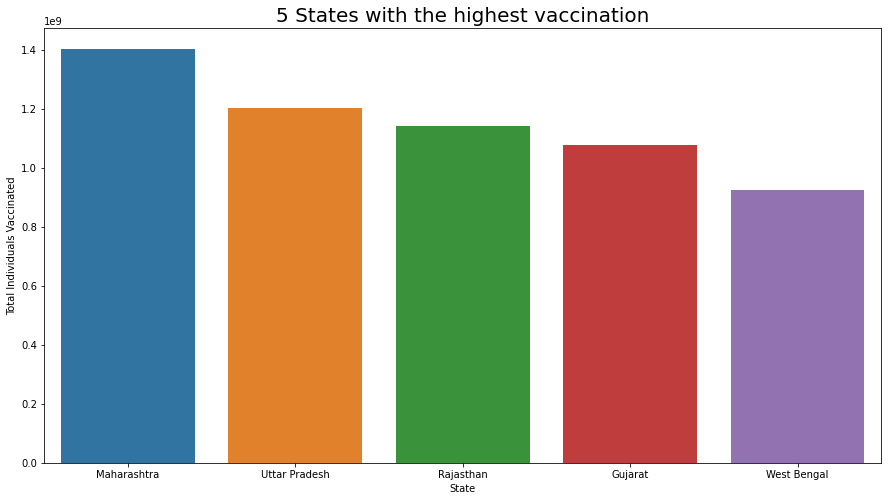

In [74]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'State', y = 'Total Individuals Vaccinated', data = vacc_status.iloc[:5])
plt.title('5 States with the highest vaccination', size = 20)

In [50]:
#5 states with the least vaccination happened
vacc_status.tail(5)

,Total Individuals Vaccinated
State,
Sikkim,16136752.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Ladakh,9466289.0
Andaman and Nicobar Islands,8102125.0
Lakshadweep,2124715.0


Text(0.5, 1.0, '5 States with the lowest vaccination')

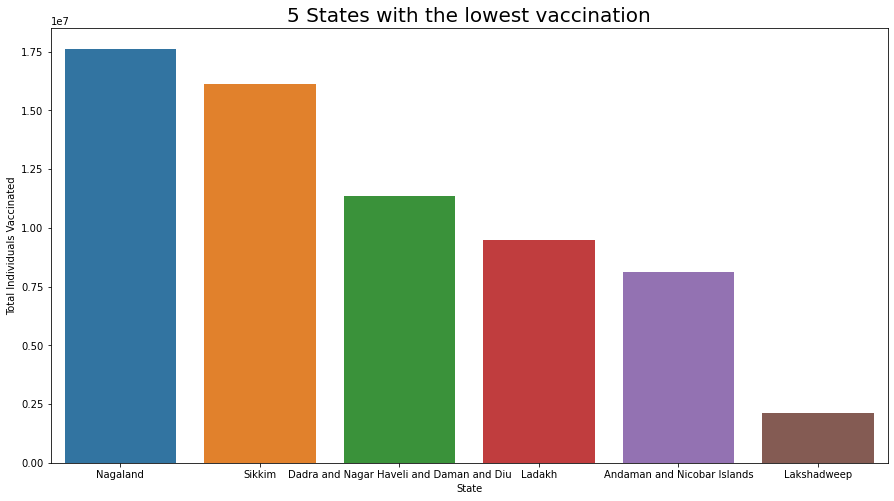

In [75]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'State', y = 'Total Individuals Vaccinated', data = vacc_status.iloc[-6:])
plt.title('5 States with the lowest vaccination', size = 20)

In [77]:
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [111]:
#Finding the age-wise vaccination

vacc_18_to_44 = vaccine['18-44 Years(Individuals Vaccinated)'].sum()
vacc_18_to_44

2602813276.0

In [104]:
vacc_45_to_60 = vaccine['45-60 Years(Individuals Vaccinated)'].sum()
vacc_45_to_60

5443932624.0

In [107]:
vacc_60_above = vaccine['60+ Years(Individuals Vaccinated)'].sum()
vacc_60_above

4904898960.0

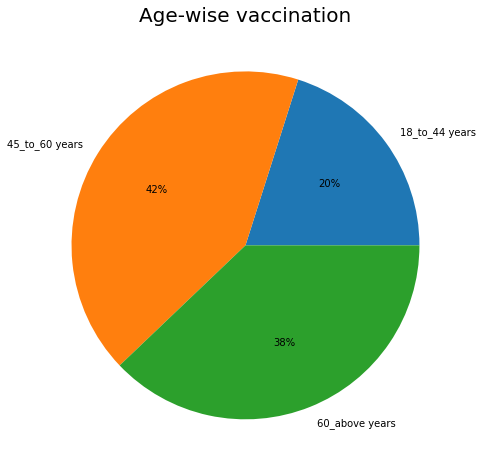

In [110]:
plt.figure(figsize = (8,8))
plt.pie(x = [vacc_18_to_44, vacc_45_to_60, vacc_60_above], labels = ['18_to_44 years', '45_to_60 years', '60_above years'], autopct='%.0f%%')
plt.title('Age-wise vaccination', size = 20)
plt.show()